# Training a Convolutional Neural Network on MNIST using Keras

**EE514: Data Analysis and Machine Learning**

[Kevin McGuinness](http://www.eeng.dcu.ie/~mcguinne/), School of Electronic Engineering, Dublin City University

---

This will be slow unless you enable GPU/TPU acceleration in Edit>Notebook Settings

## Import packages

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import keras
import random

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, Activation, MaxPooling2D
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import History
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [ ]:
import seaborn as sns
sns.set_style('white')

Set the random seed to ensure the results are repeatable

In [ ]:
random.seed(31337)

## Specify hyperparameters

In [ ]:
batch_size = 128
num_classes = 10
epochs = 20

## Load dataset
Load in the training data, reshape it, and scale it between zero and one

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1).astype(np.float32)
x_test = x_test.reshape(10000, 28, 28, 1).astype(np.float32)
x_train /= 255.0
x_test /= 255.0

Show a few examples

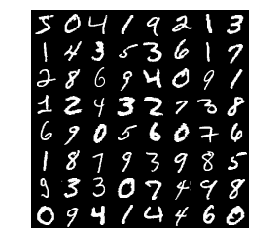

In [ ]:
x_vis = x_train[:64,].reshape(8, 8, 28, 28).transpose(0, 2, 1, 3).reshape(8*28, 8*28)
imshow(x_vis)
gray()
axis('off')
show()

One hot encode the target values

In [ ]:
encoder = OneHotEncoder(n_values=num_classes)
y_train_enc = encoder.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_enc = encoder.fit_transform(y_test.reshape(-1, 1)).todense()

## Specify the model

We'll use a feed forward CNN with two $3\times 3$ convolution layers, each with 32 filters, and 2 fully connected layers.

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-5), input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-5)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(1e-5)))
model.add(Dropout(0.50))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 6272)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               802944    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
__________

Compile the model. We are doing softmax classification so we will use categorical cross entropy for the loss function. 

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

## Fit the model

This will take about 2-3 mins per epoch on a TPU, so about an hour in total. Now's a good time to go get a coffee! Note that this is still considered quite fast to train in the deep learning world; many models take weeks on faster hardware than is available in Colab.

In [ ]:
history_callback = History()
model.fit(x_train, y_train_enc,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test_enc),
          callbacks=[history_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 165s 3ms/step - loss: 0.2344 - acc: 0.9296 - val_loss: 0.0616 - val_acc: 0.9819
Epoch 2/20
60000/60000 [==============================] - 166s 3ms/step - loss: 0.1025 - acc: 0.9712 - val_loss: 0.0532 - val_acc: 0.9841
Epoch 3/20
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0827 - acc: 0.9778 - val_loss: 0.0420 - val_acc: 0.9887
Epoch 4/20
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0691 - acc: 0.9816 - val_loss: 0.0437 - val_acc: 0.9888
Epoch 5/20
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0631 - acc: 0.9832 - val_loss: 0.0380 - val_acc: 0.9903
Epoch 6/20
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0591 - acc: 0.9848 - val_loss: 0.0416 - val_acc: 0.9892
Epoch 7/20
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0541 - acc: 0.9862 - val_loss: 0.0363 - 

## Plot the training and validation loss

In [ ]:
hist = history_callback.history
loss = hist['loss']
val_loss = hist['val_loss']
epoch = list(range(1, epochs+1))
plot(epoch, loss, 'r-', lw=2, label='train loss')
plot(epoch, val_loss, 'g-', lw=2, label='val loss')
legend()
xlabel('epoch')
ylabel('loss')
show()

Nice learning curve! Val loss is close to train loss, so we're not overfitting. 